In [12]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError, MeanSquaredError

from sklearn.metrics import r2_score, mean_squared_error



In [27]:
# x_train = features, y_train = target

df = pd.read_csv('24-iri-final-adjusted-cleaned.csv')


x = df.drop('IRI',axis=1)
y = df.IRI


# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
# import keras.backend.tensorflow_backend as K
# session_conf =  tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# K.set_session(sess)
# for later versions:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9, random_state=seed_value)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8889, random_state=seed_value)


In [28]:
def scale_datasets(x_train, x_test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)
_ , x_val_scaled = scale_datasets(x_train, x_val)


In [29]:
hidden_units1 = 16
# hidden_units2 = 12
# hidden_units3 = 12
# hidden_units1 = 160
# hidden_units2 = 480
# hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    # Dropout(0.2),
    # Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [30]:
# import tensorflow as tf
# from tensorflow.keras.metrics import Metric
# from tensorflow.keras import backend as K

# class R2KerasMetric(Metric):
#     def __init__(self, name='r2_keras', **kwargs):
#         super(R2KerasMetric, self).__init__(name=name, **kwargs)
#         self.r2_values = self.add_weight(name='r2_values', initializer='zeros')
#         self.total_samples = self.add_weight(name='total_samples', initializer='zeros')

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         y_true_flat = tf.reshape(y_true, shape=(-1,))
#         y_pred_flat = tf.reshape(y_pred, shape=(-1,))
#         residual = y_true_flat - y_pred_flat
#         ss_res = K.sum(K.square(residual))
#         ss_tot = K.sum(K.square(y_true_flat - K.mean(y_true_flat)))
#         r2 = 1 - ss_res / (ss_tot + K.epsilon())
#         current_samples = tf.cast(tf.size(y_true), dtype=tf.float32)
#         self.r2_values.assign_add(r2 * current_samples)
#         self.total_samples.assign_add(current_samples)

#     def result(self):
#         return self.r2_values / self.total_samples

#     def reset_states(self):
#         self.r2_values.assign(0.0)
#         self.total_samples.assign(0.0)

#     # Add the variables property as required by Keras
#     @property
#     def variables(self):
#         return self._collected_trainable_weights

#     # Override the get_config method to avoid issues with serialization
#     def get_config(self):
#         return {}

In [31]:
# def r2_keras(y_true, y_pred):
#     r2 = r2_score(y_true, y_pred)
#     return tf.convert_to_tensor(r2, dtype=tf.float32)  # Convert the result to a tensor


# loss function
msle = MeanSquaredLogarithmicError()
mse = MeanSquaredError()
model.compile(
    loss=mse, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=['mse' ]
)


In [32]:
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=30, 
    batch_size=32,
    # validation_split=0.1,
    validation_data=(x_val_scaled, y_val)

)

Epoch 1/30
12/12 [==============================] - 1s 24ms/step - loss: 26.6277 - mse: 26.6277 - val_loss: 24.3709 - val_mse: 24.3709
Epoch 2/30
12/12 [==============================] - 0s 6ms/step - loss: 18.5186 - mse: 18.5186 - val_loss: 13.7259 - val_mse: 13.7259
Epoch 3/30
12/12 [==============================] - 0s 7ms/step - loss: 8.2490 - mse: 8.2490 - val_loss: 9.3826 - val_mse: 9.3826
Epoch 4/30
12/12 [==============================] - 0s 5ms/step - loss: 4.6404 - mse: 4.6404 - val_loss: 8.4992 - val_mse: 8.4992
Epoch 5/30
12/12 [==============================] - 0s 6ms/step - loss: 3.8596 - mse: 3.8596 - val_loss: 5.1705 - val_mse: 5.1705
Epoch 6/30
12/12 [==============================] - 0s 6ms/step - loss: 3.1083 - mse: 3.1083 - val_loss: 4.6428 - val_mse: 4.6428
Epoch 7/30
12/12 [==============================] - 0s 5ms/step - loss: 2.8614 - mse: 2.8614 - val_loss: 4.6917 - val_mse: 4.6917
Epoch 8/30
12/12 [==============================] - 0s 5ms/step - loss: 2.6771 - 

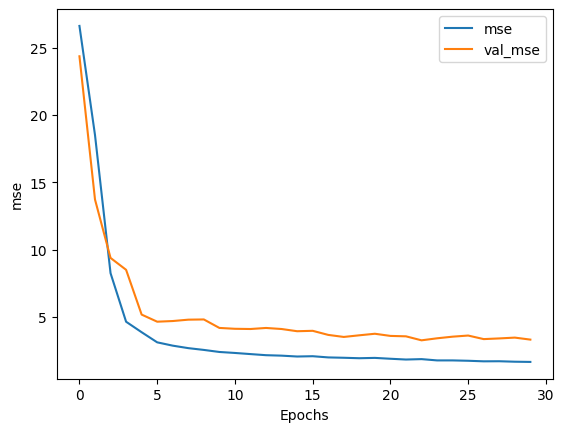

In [33]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mse')

In [34]:
x_test_prediction = model.predict(x_test_scaled)
x_train_prediction = model.predict(x_train_scaled)
model.evaluate(x_test_scaled,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 2.3331 - mse: 2.3331


[2.3330564498901367, 2.3330564498901367]

In [35]:
import numpy as np

test_mse = model.evaluate(x_test_scaled,y_test)[0]

test_r2 = 1- test_mse / np.var(y)
train_r2 = 1 - (history.history['mse'][-1]) / np.var(y)
validation_r2 = 1 - (history.history['val_mse'][-1] / np.var(y))
print(f"test_r2 = {test_r2}")
print(f"train_r2 = {train_r2}")
print(f"validation_r2 = {validation_r2}")
# old 
# test_r2 = 0.4424023853794139
# train_r2 = 0.24505748448781872
# validation_r2 = 0.197545980304494

# 2nd old
# 3/3 [==============================] - 0s 3ms/step - loss: 4.3271 - mse: 4.3271
# test_r2 = 0.3124610478106501
# train_r2 = 0.482649058552553
# validation_r2 = 0.36158442672985447

2/2 [==============================] - 0s 4ms/step - loss: 2.3331 - mse: 2.3331
test_r2 = 0.5751507500247023
train_r2 = 0.6990804332091533
validation_r2 = 0.3970867548361663


line: y = 0.5859542151500524 * x + 1.6380073108561515


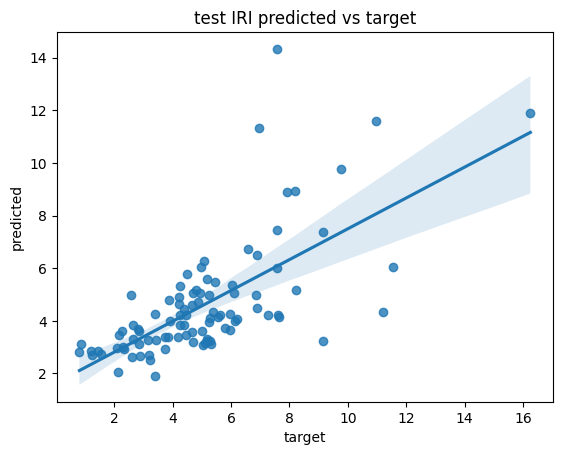

In [11]:
import seaborn as sns
ax = sns.regplot(x=y_test ,y= x_test_prediction,)
ax.set(title = 'test IRI predicted vs target', xlabel='target', ylabel='predicted')
#calculate slope and intercept of regression equation
import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")


line: y = 0.7073432421449686 * x + 1.406143206319129


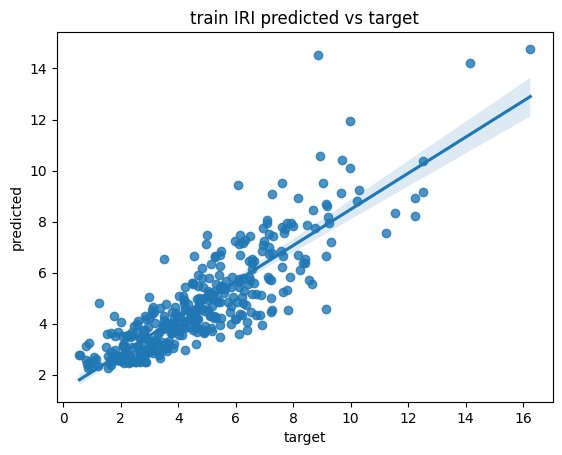

In [36]:
ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train IRI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

